# Zomato Restaurant Project

By Mónica Atiaga

Batch - DSNB1222

Internship number: 2306
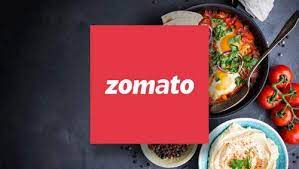

# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best 
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


### Data Storage:
This problem statement contains two datasets- **Zomato.csv** and **country_code.csv**.

**Country_code.csv** contains two variables
- Country code
- Country name

The collected data has been stored in the Comma Separated Value file **Zomato.csv**. 

Each restaurant in the dataset is uniquely identified by its Restaurant Id. 

Every Restaurant contains the following variables:
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
- Latitude: Latitude coordinate of the restaurant&#39;s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies   
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

### Problem statement : 
In this dataset predict 2 things –
1. Average Cost for two
2. Price range


**Hint :** Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


### Dataset Link
* https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
* https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

#### Raw files:
- https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv
- https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx

In [3]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')

### Load the dataset

In [4]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv"

# Read the CSV file into a DataFrame
df_zomato = pd.read_csv(url, encoding='ISO-8859-1')

In [5]:
url2 = "https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx"
df_country = pd.read_excel(url2)
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


### Merge the dataframes

In [6]:
# Merge the dataframes on 'Country Code'
df = pd.merge(df_zomato, df_country, on='Country Code', how='left')
df[['Restaurant ID','Country Code','Country']].sample(5)

,Restaurant ID,Country Code,Country
7023,18261701,1,India
946,18270895,1,India
3798,308315,1,India
5342,2942,1,India
5797,8718,1,India


The information of both, df_zomato and df_country, was merged into one dataset.

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [7]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [8]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [9]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (9551, 22)

The column headers in the dataset: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


This dataset comprises 9,551 rows and 22 columns. Among these, the variables 'Average Cost for Two' and 'Price Range' are designated as targets for distinct analytical approaches. The remaining 20 variables serve as independent variables, as outlined in the Project Description section.

Given the dataset's dual perspectives, we aim to analyze 'Average Cost for Two' as a regression problem and 'Price Range' as a classification problem during the Exploratory Data Analysis (EDA) phase. 

In [10]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

There are three types of data (float64, int64, and object ) present in the dataset, which corresponding features according to the data type will be listed as follows:

In [11]:
# List object variables
object_vars = df.select_dtypes(include='object').columns.tolist()
print(f"Object/Categorical variables:\n{object_vars}\n{len(object_vars)} in total\n")

# List int64 variables
int_vars = df.select_dtypes(include='int64').columns.tolist()
print(f"int64 variables:\n{int_vars}\n{len(int_vars)} in total\n")

# List float64 variables
float_vars = df.select_dtypes(include='float64').columns.tolist()
print(f"float64 variables:\n{float_vars}\n{len(float_vars)} in total\n")

Object/Categorical variables:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']
14 in total

int64 variables:
['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes']
5 in total

float64 variables:
['Longitude', 'Latitude', 'Aggregate rating']
3 in total



## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [12]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Restaurant ID,0,0.00
Restaurant Name,0,0.00
Country Code,0,0.00
City,0,0.00
Address,0,0.00
Locality,0,0.00
Locality Verbose,0,0.00
Longitude,0,0.00
Latitude,0,0.00
Cuisines,9,0.09


In [13]:
print(f"The dataset presents {df.isnull().sum().sum()} missing values.")

The dataset presents 9 missing values.


Upon initial inspection, the dataset appears to be free of missing values, with the exception of the 'Cuisines' feature, which contains 9 instances of missing data.

 The missing values will be treated in further sections, but first, we will do EDA.

### 1.2.2 Heatmap with missing values

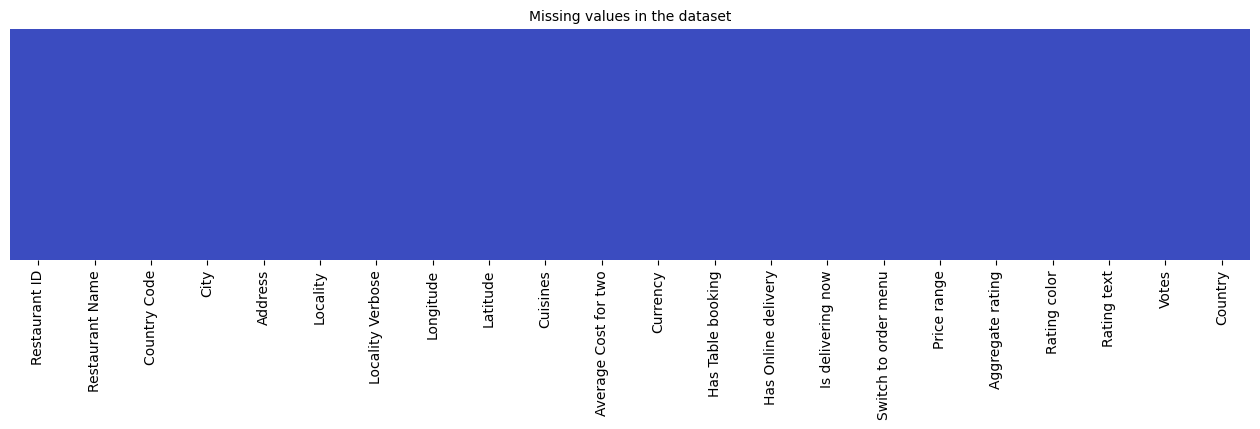

In [14]:
# Let's visualize it using heatmap
plt.figure(figsize=(16,3))
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm', cbar=False)
plt.title('Missing values in the dataset', fontsize=10);

## 1.3 Features Analysis
### 1.3.1 Unique values

In [15]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values

# List of categorical variables
display(info_df[(info_df['type'] == 'object')])
display(info_df[(info_df['type'] != 'object')])


,No. of unique values,type
Restaurant Name,7446,object
City,141,object
Address,8918,object
Locality,1208,object
Locality Verbose,1265,object
Cuisines,1825,object
Currency,12,object
Has Table booking,2,object
Has Online delivery,2,object
Is delivering now,2,object


,No. of unique values,type
Restaurant ID,9551,int64
Country Code,15,int64
Longitude,8120,float64
Latitude,8677,float64
Average Cost for two,140,int64
Price range,4,int64
Aggregate rating,33,float64
Votes,1012,int64


Regarding the number of unique values in the dataset:

- The 'Restaurant ID' column contains unique values identical to the dataset's total rows. This column serves solely for record identification and does not influence the target variable. Therefore, it can be safely dropped.

- The 'Address' column displays high cardinality with 8,918 unique values out of a total of 9,551 rows, constituting approximately 93.4% of the data. Considering that 'Country', 'City', 'Longitude', and 'Latitude' already provide location information, retaining the 'Address' column may not contribute significantly to the model. Consequently, it is advisable to consider dropping this feature to streamline the dataset.

- The column 'Switch to order menu' consists of only a single unique value. As it does not contribute any additional valuable information for the predictive model, it is advisable to drop this column.

- The 'Latitud' and 'Longitud' columns will undergo further analysis due to their high cardinality and conceptual connection, potentially carrying meaningful information when considered together.

- Despite the 'Restaurant Name' presenting high cardinality, a count of unique values reveals instances where multiple restaurants share the same name. Further analysis is necessary to determine whether encoding based on characteristics can be applied.

- **'Average Cost for Two' - Regression Problem:** 'Average Cost for Two' is the target variable with 140 unique values out of 9,551 total in the dataset. This indicates a regression problem since the target variable is continuous and numerical.

- **'Price Range' - Classification Problem:** 'Price Range' is another target variable with four unique values (3, 4, 2, 1) out of 9,551 total in the dataset. This confirms that we are dealing with a classification problem.

- **Numerical Columns as Categorical:** Columns such as 'Country Code' (15) and 'Aggregate Rating' (33), while numerical, seem to represent categorical information. These columns will be treated as categorical during EDA.

Next, we will remove the columns 'Restaurant ID', 'Address' for the reasons explained previously.

In [16]:
# Dropping the columns 'Restaurant ID' and 'Address'
df.drop(['Restaurant ID', 'Address', 'Switch to order menu' ], axis=1, inplace=True)
display(df.sample(5))

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
7984,Asia Seven Express,1,New Delhi,"Worldmark 1, Aerocity","Worldmark 1, Aerocity, New Delhi",77.121785,28.550413,Chinese,500,Indian Rupees(Rs.),No,No,No,2,0.0,White,Not rated,3,India
8724,Cafe Coffee Day,1,Noida,Sector 50,"Sector 50, Noida",77.361918,28.570513,Cafe,450,Indian Rupees(Rs.),No,No,No,1,2.7,Orange,Average,42,India
3966,Gupta's Vegetarian Paradise,1,New Delhi,Hauz Khas,"Hauz Khas, New Delhi",77.211648,28.563631,North Indian,500,Indian Rupees(Rs.),No,No,No,2,0.0,White,Not rated,1,India
1916,Costa Coffee,1,Gurgaon,Sector 39,"Sector 39, Gurgaon",77.040797,28.439548,Cafe,600,Indian Rupees(Rs.),No,No,No,2,0.0,White,Not rated,0,India
7440,Gyan Di Hatti,1,New Delhi,Tagore Garden,"Tagore Garden, New Delhi",77.114641,28.653589,North Indian,200,Indian Rupees(Rs.),No,No,No,1,2.9,Orange,Average,5,India


In [17]:
print(f"The rows and columns in the dataset: {df.shape}")

The rows and columns in the dataset: (9551, 19)


Now the dataset contains 9951 rows and 19 columns. The target variables and  independent variables.

#### 1.3.1.1 Average Cost for two unique values

In [18]:
# Inspect the unique values of the target variable
column = 'Average Cost for two'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Average Cost for two:
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64
Unique values: [0, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 120, 125, 130, 140, 150, 160, 170, 180, 190, 200, 220, 230, 240, 250, 260, 270, 280, 285, 290, 294, 300, 315, 320, 330, 350, 360, 390, 400, 410, 430, 445, 450, 500, 515, 535, 545, 550, 570, 600, 650, 700, 720, 750, 800, 850, 900, 950, 955, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1540, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100, 2200, 2300, 2350, 2400, 2500, 2600, 2650, 2700, 2800, 2900, 3000, 3200, 3210, 3300, 3500, 3600, 3650, 3700, 3800, 4000, 4100, 4200, 4300, 4400, 4500, 4700, 4800, 5000, 5100, 5500, 6000, 6500, 7000, 8000, 70000, 100000, 120000, 150000, 165000, 200000, 250000, 300000, 350000, 

The target variable 'Average Cost for two' has 140 unique values of the 9551 rows in the dataset. In order to predict this feature we need to build a regression model.

#### 1.3.1.2 Price range unique values

In [19]:
# Inspect the unique values of the target variable
column = 'Price range'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {df[column].unique()}")
print(f"# unique values: {df[column].nunique()}")

Feature Price range:
1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64
Unique values: [3 4 2 1]
# unique values: 4


The target variable 'Price range' has 4 unique values of the 9551 rows in the dataset. In order to predict this feature we will build a classification model since the variable is categorical.

#### 1.3.1.3 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [20]:
# Separating Numerical and Categorical columns
categorical_col =  df.select_dtypes(include='object').columns.tolist()
num_cat_col = ['Country Code', 'Aggregate rating']
numerical_col =  [col for col in df.select_dtypes(include=np.number).columns.tolist() if col not in num_cat_col]

# Remove the target variables since they will be analyzed separately
numerical_col.remove('Average Cost for two')
numerical_col.remove('Price range')

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns that represent a category:\n {num_cat_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']

Numerical Columns that represent a category:
 ['Country Code', 'Aggregate rating']

Numerical Columns:
 ['Longitude', 'Latitude', 'Votes']



#### Categorical columns

In [21]:
for i, column in enumerate(categorical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature Restaurant Name:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
# unique values: 7446

2.Feature City:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64
# unique values: 141

3.Feature Locality:
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                     

#### Numerical columns

In [22]:
for i, column in enumerate(numerical_col + num_cat_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature Longitude:
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: Longitude, Length: 8120, dtype: int64
# unique values: 8120

2.Feature Latitude:
0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.645175      1
28.646194      1
28.648280      1
28.643514      1
40.984776      1
Name: Latitude, Length: 8677, dtype: int64
# unique values: 8677

3.Feature Votes:
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: Votes, Length: 1012, dtype: int64
# unique values: 1012

4.Feature Country Code:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
# u

Although the above columns are numerical, some of them will be analyzed as categorical since they are discrete, as is the case of 'Country Code' and 'Aggregate rating'.

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [23]:
# Summary statistics of numerical columns
stats = df.describe()
stats

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [24]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,Restaurant Name,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text,Country
count,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,1208,1265,1825,12,2,2,2,6,6,15
top,Cafe Coffee Day,New Delhi,Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,Orange,Average,India
freq,83,5473,122,122,936,8652,8393,7100,9517,3737,3737,8652


**Observations**
- The summary of the dataset looks perfect since there are no negative/invalid values present.
- However, The counts of 'Cuisines' have a difference from the total of rows which means there are missing values in this column as we mentioned in previous sections.

Next, we will analyze the skewness present in the columns, and infer the present of outliers.

In [25]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Average Cost for two    799.210763
Votes                   125.909748
Country Code             17.365616
Price range              -0.195163
Aggregate rating         -0.533630
Latitude                 -2.716088
Longitude               -13.065390
dtype: float64

The mean value is larger than the median(50%) in columns 'Average Cost for two' and 'Votes'columns. Therefore, the data could be skewed to the right.  'Country Code' is categorical despite of being numeric.
In the columns 'Longitud' and 'Latitude' the median(50%) is larger than the mean, then the data could be skewed to the left.

In [26]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Average Cost for two    766558.423090
Votes                     9916.751962
Country Code                84.133293
Longitude                   27.771399
Latitude                     8.106729
Price range                  0.383945
Aggregate rating            -0.799125
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features 'Average Cost for two' and 'Votes'columns listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [27]:
# Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 0 duplicate rows, which represent 0.000% of the data.


There are no duplicate records in the dataset.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Average Cost for two feature

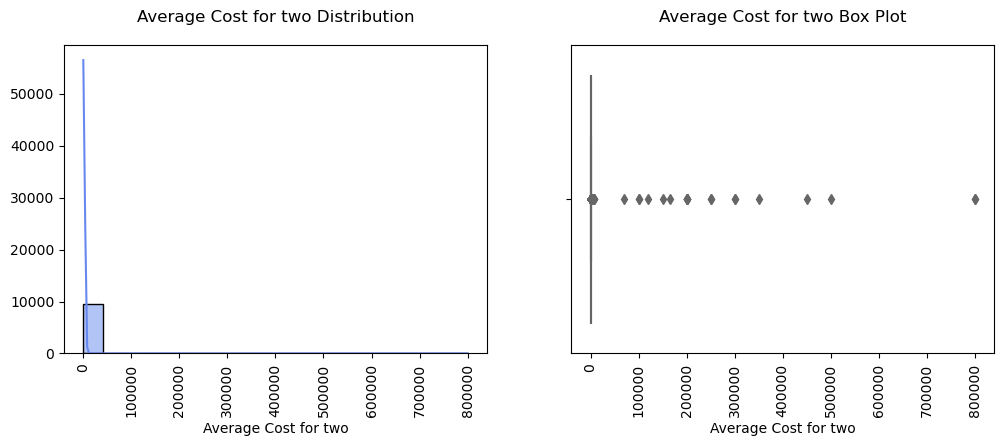

Skewness of Average Cost for two : 35.477914900871276


In [28]:
#Visualize target distribution
col = 'Average Cost for two'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Average Cost for two' is skewed to the right and presents outliers in the Box plot.

#### 1.4.1.2 Price range feature

In [29]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

In [30]:
# Distribution of Price range
df['Price range'].value_counts().to_frame()

,Price range
1,4444
2,3113
3,1408
4,586


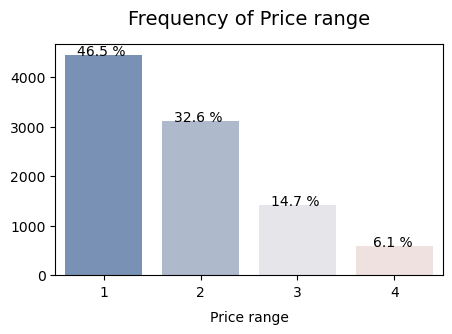

In [31]:
# Set the custom palette
sns.set_palette('vlag')

# Visualize the frequency of RainTomorrow
col = 'Price range'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Out of the total dataset, 4,444 entries (46.5%) fall within price range 1, followed by 3,113 entries (32.6%) in range 2, 1,408 entries (14.7%) in range 3, and 586 entries (6.1%) in range 4. It's worth noting that the distribution of the target variable, representing the price ranges, is imbalanced.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [32]:
# List of categorical columns that look like categories
for i,col in enumerate(categorical_col[:-1]):
    print(f"{i+1}. {col}:   {df[col].nunique()} unique values")

1. Restaurant Name:   7446 unique values
2. City:   141 unique values
3. Locality:   1208 unique values
4. Locality Verbose:   1265 unique values
5. Cuisines:   1825 unique values
6. Currency:   12 unique values
7. Has Table booking:   2 unique values
8. Has Online delivery:   2 unique values
9. Is delivering now:   2 unique values
10. Rating color:   6 unique values
11. Rating text:   6 unique values


The columns 'Restaurant Name,' 'Locality,' 'Locality Verbose,' and 'Cuisines' exhibit high cardinality issues, despite being categorical variables. Consequently, these features will not be subjected to data visualizations. Instead, feature engineering and other strategies will be employed to address the high cardinality in subsequent sections.

#### City (2)

This column also exhibits high cardinality. To address this, we plan to visualize the counts for the top 10 most representative cities and list the counts for the remaining 131 cities. This approach aims to provide a concise representation of the data while highlighting the prevalence of the most frequent cities.

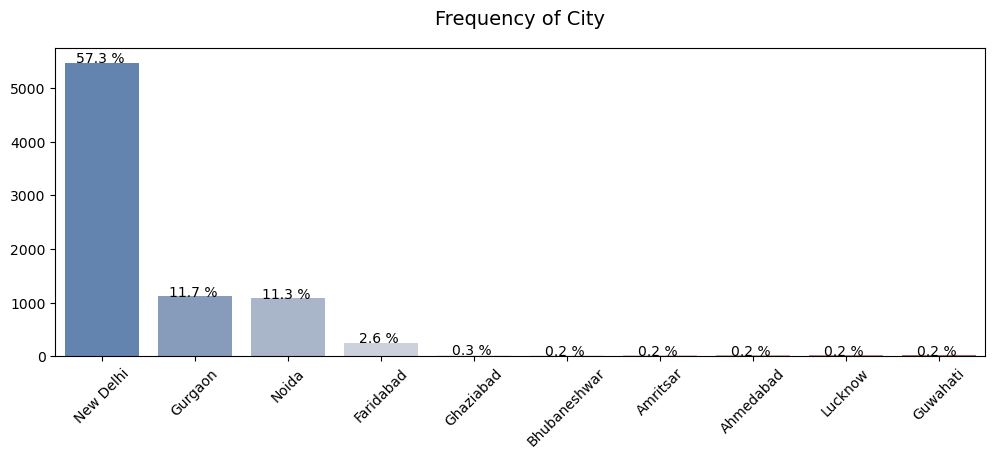

In [33]:
# Visualize the frequency of City(2)
col = 'City'
plt.figure(figsize=(12, 4))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts[:10].index, y=df_counts[:10].values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [34]:
# List the rest of the cities.
display(df_counts[11:])

Rest of Hawaii      20
Kochi               20
Kolkata             20
Pocatello           20
Pensacola           20
                    ..
Panchkula            1
Mc Millan            1
Mayfield             1
Macedon              1
Vineland Station     1
Name: City, Length: 130, dtype: int64

The dataset comprises observations for 141 cities, with the majority being in New Delhi (57.3%). Following New Delhi, the distribution includes Gurgaon (11.7%), Noida (11.3%), Faridabad (2.6%), and other cities with smaller proportions. For Guwahati, Ludknow, Ahmedabad, Amritsar, and Bhubaneshwar, there are additional observations, each representing 0.2% or less in the aforementioned list.

#### Currency (6)

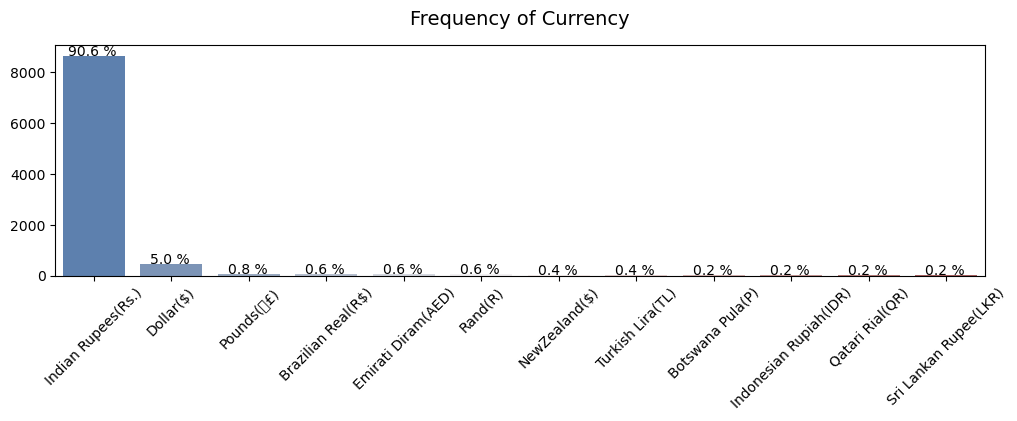

In [35]:
# Visualize the frequency of Currency(6)
col = 'Currency'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The dominant currency is the Indian Rupee (Rs.), accounting for 90.6% of occurrences, followed by the US Dollar ($'$) at 5.0%, the British Pound at 0.8%, and so forth. The least represented currencies are the Botswana Pula (P), Indonesian Rupiah (IDR), Qatari Rial (QR), and Sri Lankan Rupee (LKR) at 0.2%

#### Has Table booking (7)

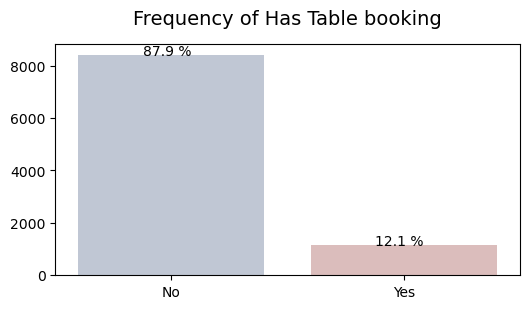

In [36]:
# Visualize the frequency of Has Table booking(7)
col = 'Has Table booking'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Of the total observations, 87.9% indicate the absence of table bookings, while 12.1% indicate the presence of a booking.

#### Has Online delivery (8)

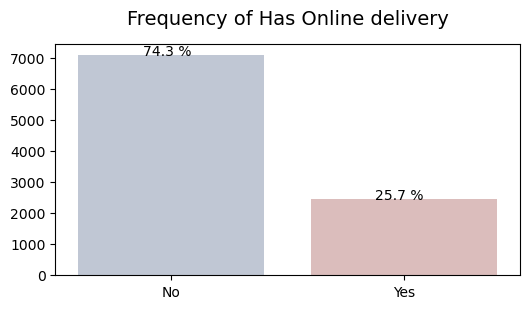

In [37]:
# Visualize the frequency of Has Online delivery(8)
col = 'Has Online delivery'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Out of the total observations, 74.3% indicate the absence of online delivery, while 25.7% indicate the presence of online delivery.

#### Is delivering now (9)

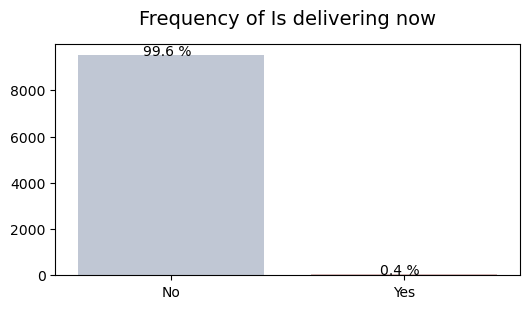

In [38]:
# Visualize the frequency of Is delivering now(9)
col = 'Is delivering now'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Out of the total observations, 99.6% indicate No for is delivering now, while 0.4% indicate Yes for is delivering now.

1. Restaurant Name:   7446 unique values
2. City:   141 unique values
3. Locality:   1208 unique values
4. Locality Verbose:   1265 unique values
5. Cuisines:   1825 unique values
6. Currency:   12 unique values
7. Has Table booking:   2 unique values
8. Has Online delivery:   2 unique values
9. Is delivering now:   2 unique values
10. Rating color:   6 unique values
11. Rating text:   6 unique values

#### Rating color (10)

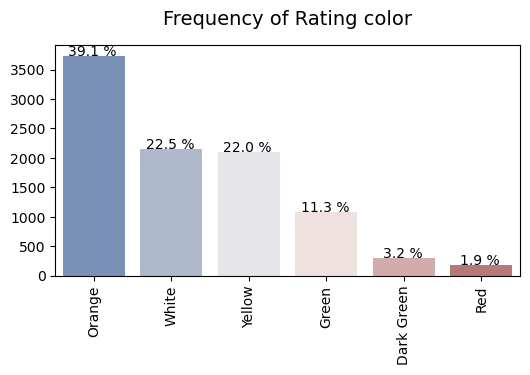

In [39]:
# Visualize the frequency of Rating color(10)
col = 'Rating color'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In terms of rating color distribution, the dataset shows that 39.1% of the entries are labeled as Orange, 22.5% as White, 22% as Yellow, 11.3% as Green, 3.2% as Dark Green, and 1.9% as Red.

#### Numerical columns

In [42]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Longitude
2. Latitude
3. Votes


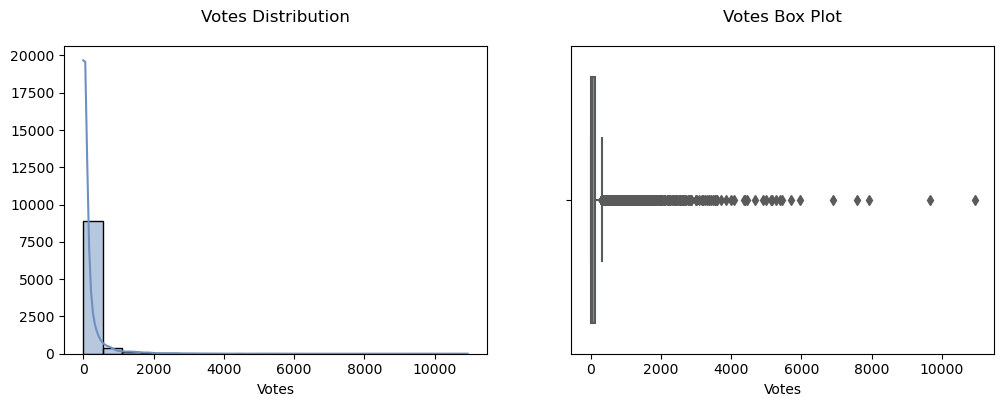

Skewness of Votes : 8.807636687709472


In [43]:
#Visualize (3) Votes
col = 'Votes'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Votes' is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.4 Univariate Boxplot

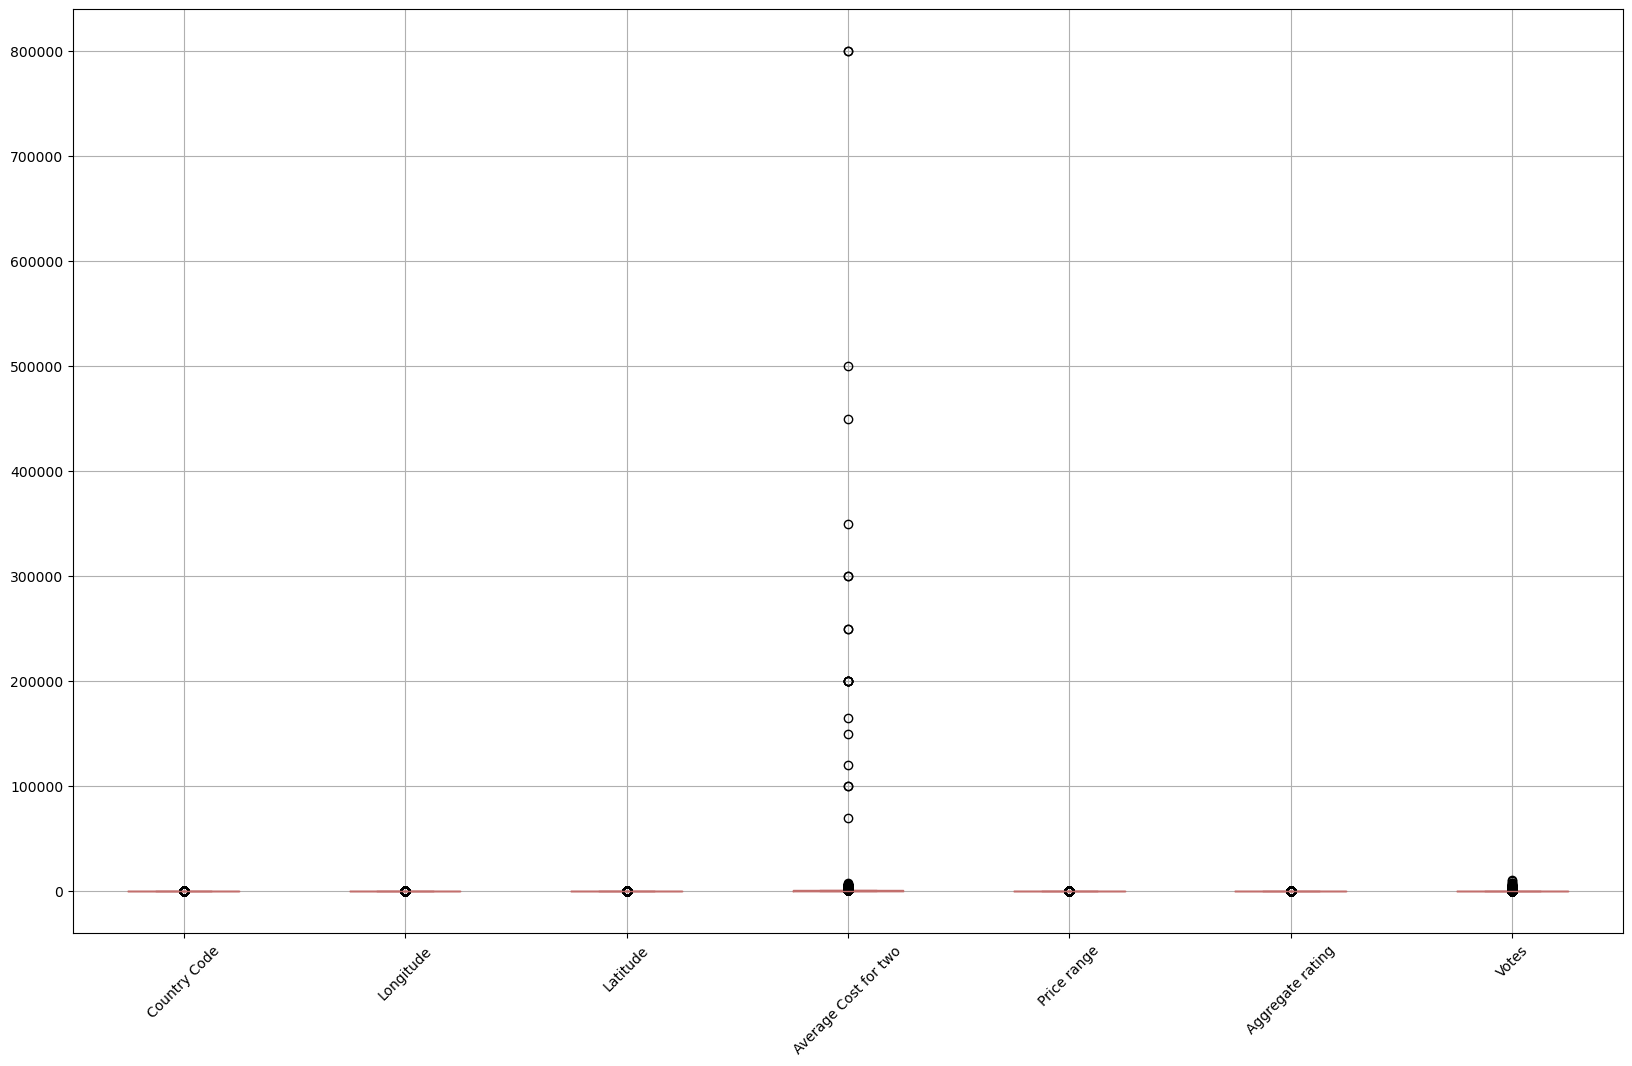

In [44]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

### 1.4.2  Bivariate Analysis

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga